macro-scale progress...100%|████████████████████████████| Time: 0:16:07
Creating a gif...100%|██████████████████████████████████| Time: 0:00:52
┌ Info: Saved animation to 
│   fn = /home/mkoehler/Repos/advection-diffusion-catalysis/data/simulation/nonlinear_micro_problem/calibration/Dᵢ=0.000835_Q=4.459152_k=10.0502_kᵧ=1_kₙ=0.855767_microcomp_type=nonlinear/nonlinear-reaction.gif
└ @ Plots /home/mkoehler/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/mkoehler/Repos/advection-diffusion-catalysis/data/simulation/nonlinear_micro_problem/calibration/Dᵢ=0.000835_Q=4.459152_k=10.0502_kᵧ=1_kₙ=0.855767_microcomp_type=nonlinear/nonlinear-reaction.gif")
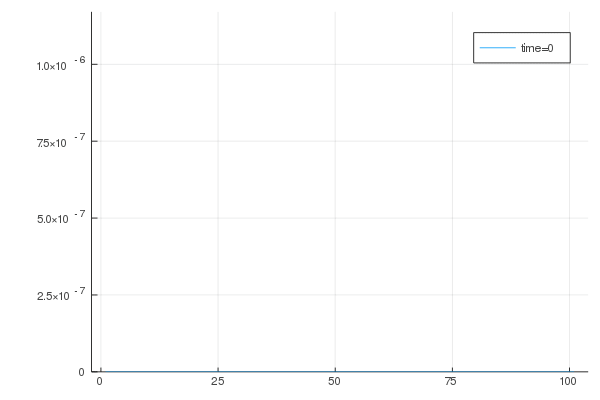

In [5]:
using DrWatson
using Plots
@quickactivate :Catalyst

path="simulation/nonlinear_micro_problem/calibration"
input_exp=Float64[]
output_exp=Float64[]

for row in CSV.File(datadir("experiment/new-data.csv"); delim=" ")
    push!(input_exp, row.I)
    push!(output_exp, row.O)
end

Dᵢ=0.00083486; kᵧ=1.; k=10.0502; microcomp_type=:nonlinear; Q=4.459152; kₙ=0.855767
d = (Dᵢ=Dᵢ, kᵧ=kᵧ, k=k,microcomp_type=microcomp_type, Q=Q, kₙ=kₙ)
save = DrWatson.savename(d, digits=6)

cd(datadir(path))
mkdir(save)
mkdir("$save/paraview")
mkdir("$save/fields")
mkdir("$save/fields/c")
mkdir("$save/fields/R")
mkdir("$save/fields/cPsim")

c, R = Catalyst.solve(Dᵢ, k, kᵧ, input_exp, output_exp, microsave=true,
                      microsave_time=1:1000, microsave_path=datadir("$path/$save/paraview"),
                      microcomp_type=:nonlinear, Q=Q, kₙ=kₙ)

Catalyst.save_all(c, R, save, datadir("$path/$save/fields"))

maxR = maximum(maximum.(R))
maxR *= 1.1

Catalyst.plotAnimation(R, "$save/$microcomp_type-reaction.gif", (0, maxR))

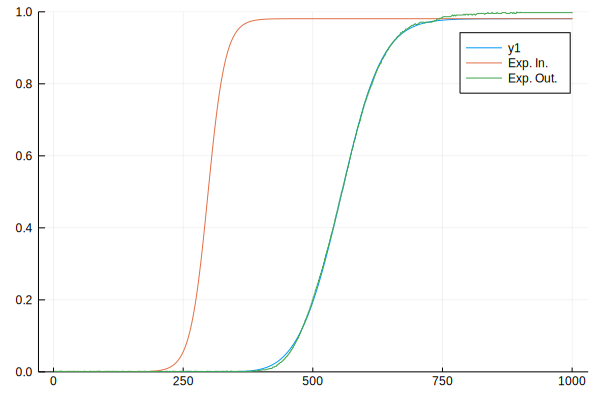

In [6]:
Catalyst.plotOverTime(c)
plot!(input_exp, label="Exp. In.")
plot!(output_exp, label="Exp. Out.")